## **Importing Necessary Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset


In [4]:
data_dir = 'C:/Users/SPPL IT/Desktop/Study/CVPR_ASSIGNMENT/CVPR/MID/synthetic_clusters_numerical.csv'

In [5]:
data = pd.read_csv(data_dir)

In [6]:
# Extract features and labels
features = data[['x', 'y']].values
labels = data['label'].values

print(labels.size)

90


## One-Hot Encoding

In [7]:
def one_hot_encode(labels, num_classes=3):
    encoded = np.zeros((labels.size, num_classes))
    for idx, label in enumerate(labels):
        encoded[idx, label] = 1
    return encoded

In [8]:
Y2_train = one_hot_encode(labels)
features_train = features

## **Neural Network**

In [9]:
class Neural_Network:
    def __init__(self):
        input_layer_neurons = 2
        hidden_layer_neurons_1 = 4
        hidden_layer_neurons_2 = 5
        hidden_layer_neurons_3 = 6
        output_layer_neurons = 3

        self.learning_rate = 0.01
        self.Weight_Input_Hidden1 = np.random.randn(input_layer_neurons, hidden_layer_neurons_1)
        self.Weight_Hidden1_Hidden2 = np.random.randn(hidden_layer_neurons_1, hidden_layer_neurons_2)
        self.Weight_Hidden2_Hidden3 = np.random.randn(hidden_layer_neurons_2, hidden_layer_neurons_3)
        self.Weight_Hidden3_Output = np.random.randn(hidden_layer_neurons_3, output_layer_neurons)

    def forwardProp(self, input):
        self.hiddenLayer1Input = np.dot(input, self.Weight_Input_Hidden1)
        self.hiddenLayer1Output = self.Sigmoid(self.hiddenLayer1Input)

        self.hiddenLayer2Input = np.dot(self.hiddenLayer1Output, self.Weight_Hidden1_Hidden2)
        self.hiddenLayer2Output = self.Sigmoid(self.hiddenLayer2Input)

        self.hiddenLayer3Input = np.dot(self.hiddenLayer2Output, self.Weight_Hidden2_Hidden3)
        self.hiddenLayer3Output = self.Sigmoid(self.hiddenLayer3Input)

        self.outputLayerInput = np.dot(self.hiddenLayer3Output, self.Weight_Hidden3_Output)
        self.outputLayerOutput = self.Softmax(self.outputLayerInput)

        return self.outputLayerOutput

    def BackProp(self, input, target, pred):
        output_error = target - pred
        output_delta = self.learning_rate * output_error

        hiddenLayer3_error = np.dot(output_delta, self.Weight_Hidden3_Output.T)
        hiddenLayer3_delta = self.learning_rate * hiddenLayer3_error * self.Sigmoid_Deriv(self.hiddenLayer3Output)

        hiddenLayer2_error = np.dot(hiddenLayer3_delta, self.Weight_Hidden2_Hidden3.T)
        hiddenLayer2_delta = self.learning_rate * hiddenLayer2_error * self.Sigmoid_Deriv(self.hiddenLayer2Output)

        hiddenLayer1_error = np.dot(hiddenLayer2_delta, self.Weight_Hidden1_Hidden2.T)
        hiddenLayer1_delta = self.learning_rate * hiddenLayer1_error * self.Sigmoid_Deriv(self.hiddenLayer1Output)

        self.Weight_Input_Hidden1 += np.dot(input.T, hiddenLayer1_delta)
        self.Weight_Hidden1_Hidden2 += np.dot(self.hiddenLayer1Output.T, hiddenLayer2_delta)
        self.Weight_Hidden2_Hidden3 += np.dot(self.hiddenLayer2Output.T, hiddenLayer3_delta)
        self.Weight_Hidden3_Output += np.dot(self.hiddenLayer3Output.T, output_delta)

    def Sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def Sigmoid_Deriv(self, sig):
        return sig * (1 - sig)

    def Softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Prevent overflow
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def ErrMean(self, input, target):
        predictions = self.forwardProp(input)
        return np.mean(np.square(target - predictions))

    def train(self, input, target):
        output = self.forwardProp(input)
        self.BackProp(input, target, output)

In [10]:
NN = Neural_Network()

In [11]:
err_list = []
for i in range(200000):
    NN.train(features_train, Y2_train)
    err = NN.ErrMean(features_train, Y2_train)

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, Error: {err}')

Epoch: 0, Error: 0.3941020159889941
Epoch: 10000, Error: 5.5787186802847536e-05
Epoch: 20000, Error: 1.1162521553742029e-05
Epoch: 30000, Error: 4.49105341035702e-06
Epoch: 40000, Error: 2.3787802434966883e-06
Epoch: 50000, Error: 1.4602951580902042e-06
Epoch: 60000, Error: 9.829053053058374e-07
Epoch: 70000, Error: 7.045434430628694e-07
Epoch: 80000, Error: 5.286347226994701e-07
Epoch: 90000, Error: 4.1065417704126024e-07
Epoch: 100000, Error: 3.278149533209679e-07
Epoch: 110000, Error: 2.6749456727499916e-07
Epoch: 120000, Error: 2.2225221640047552e-07
Epoch: 130000, Error: 1.8747571860243846e-07
Epoch: 140000, Error: 1.6018527958236425e-07
Epoch: 150000, Error: 1.383876105010102e-07
Epoch: 160000, Error: 1.2070924590103846e-07
Epoch: 170000, Error: 1.061793292183906e-07
Epoch: 180000, Error: 9.409615733553107e-08
Epoch: 190000, Error: 8.39425469872918e-08


## Visualization

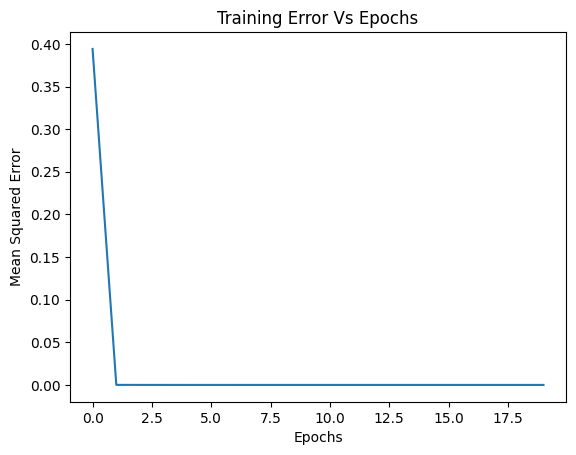

In [12]:
plt.plot(err_list)
plt.title('Training Error Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
def plot_decision_regions(features, labels, model):

    # Set Seaborn style for better visuals
    sns.set(style="whitegrid")

    # Create a meshgrid
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.forwardProp(grid_points)
    predicted_classes = np.argmax(predictions, axis=1)

    # Reshape predictions to match the grid shape
    predicted_classes = predicted_classes.reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(10, 6))
    contour = plt.contourf(xx, yy, predicted_classes, alpha=0.6, cmap="viridis")
    cbar = plt.colorbar(contour)
    cbar.set_label("Predicted Classes")

    # Scatter plot of the original data points
    scatter = sns.scatterplot(x=features[:, 0], y=features[:, 1], 
                               hue=labels, palette="coolwarm", edgecolor='k', s=50)
    scatter.legend_.set_title("True Classes")

    # Add labels, title, and improved aesthetics
    plt.title("Decision Regions", fontsize=16)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


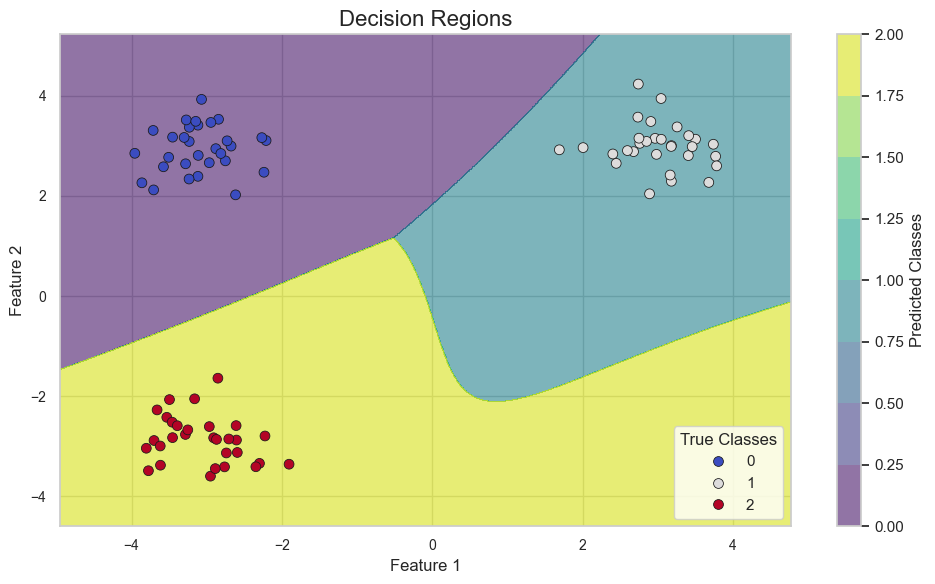

In [14]:
plot_decision_regions(features_train, labels, NN)
